In [2]:
# importing required libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# version of numpy library
print("Version of numpy:", np.__version__)

Version of numpy: 1.19.4


In [5]:
# version of matplotlib library
import matplotlib

print("Version of matplotlib:", matplotlib.__version__)

Version of matplotlib: 3.3.2


In [7]:
# set random seed
np.random.seed(42)

In [8]:
# creating the input array
X = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1]])

print("Input:\n", X)

# shape of input array
print("\nShape of Input:", X.shape)

Input:
 [[1 0 0 0]
 [1 0 1 1]
 [0 1 0 1]]

Shape of Input: (3, 4)


In [9]:
# converting the input in matrix form
X = X.T
print("Input in matrix form:\n", X)

# shape of input matrix
print("\nShape of Input Matrix:", X.shape)

Input in matrix form:
 [[1 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]]

Shape of Input Matrix: (4, 3)


In [16]:
# creating the output array
y = np.array([[1], [1], [0]])

print("Actual Output:\n", y)

# output in matrix form
y = y.T

print("\nOutput in matrix form:\n", y)

# shape of input array
print("\nShape of Output:", y.shape)

Actual Output:
 [[1]
 [1]
 [0]]

Output in matrix form:
 [[1 1 0]]

Shape of Output: (1, 3)


Now that our input and output data is ready, let’s define our neural network. We will define a very simple architecture, having one hidden layer with just three neurons

<figure style="margin: 0.5em; text-align: center;">
    <img style="margin: 0.1em; padding-top: 0.5em; width: 15vw;"
    onclick="window.open('https://tinyurl.com/ydcgnt8j')"
    src    ="https://tinyurl.com/ybq3wyvg"
    alt    ="Neural network architeccture"
    title  ="Neural network architeccture"
    />
</figure>


In [17]:

inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

Then, we will initialize the weights for each neuron in the network. The weights we create have values ranging from 0 to 1, which we initialize randomly at the start.

For simplicity, we will not include bias in the calculations, but you can check the simple implementation we did before to see how it works for the bias term



In [18]:
# initializing weight
# Shape of weights_input_hidden should number of neurons at input layer * number of neurons at hidden layer
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))

# Shape of weights_hidden_output should number of neurons at hidden layer * number of neurons at output layer
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)


In [19]:
# shape of weight matrix
weights_input_hidden.shape, weights_hidden_output.shape
# We are using sigmoid as an activation function so defining the sigmoid function here


((4, 3), (3, 1))

In [20]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

And then, we will implement our forward pass, first to get the hidden layer activations and then for the output layer. Our forward pass would look something like this

<figure style="margin: 0.5em; text-align: center;">
    <img style="margin: 0.1em; padding-top: 0.5em; width: 40vw;"
    onclick="window.open('https://tinyurl.com/ydcgnt8j')"
    src    ="https://tinyurl.com/ya89tbsp"
    alt    ="Forward Pass"
    title  ="Forward Pass"
    />
</figure>



In [22]:
# hidden layer activations

hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

In [23]:
# calculating the output
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output = sigmoid(outputLayer_linearTransform)

In [24]:
# output
output

array([[0.6568282 , 0.68362611, 0.71323735]])

In [25]:
# calculating error
error = np.square(y - output) / 2
error

array([[0.05888344, 0.05004622, 0.25435376]])

We have completed our forward propagation step and got the error. Now let’s do a backward propagation to calculate the error with respect to each weight of the neuron and then update these weights using simple gradient descent.

Firstly we will calculate the error with respect to weights between the hidden and output layers. Essentially, we will do an operation such as this

<figure style="margin: 0.5em; text-align: center;">
    <img style="margin: 0.1em; padding-top: 0.5em; width: 40vw;"
    onclick="window.open('https://tinyurl.com/ydcgnt8j')"
    src    ="https://tinyurl.com/ya89tbsp"
    alt    ="Forward Pass"
    title  ="Forward Pass"
    />
</figure>

where to calculate this, the following would be our intermediate steps using the chain rule

+ Rate of change of error w.r.t output
+ Rate of change of output w.r.t Z2
+ Rate of change of Z2 w.r.t weights between hidden and output layer

In [27]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

In [28]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

In [29]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

In [30]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_outputLayer_LinearTransform.shape, outputLayer_LinearTransform_wrt_weights_hidden_output.shape


((1, 3), (1, 3), (3, 3))

In [31]:
# shape of weights of output layer
weights_hidden_output.shape

(3, 1)

Now as we saw before, we can define this operation formally using this equation

$$ \frac{dE}{dW_{ho}} = \frac{dZ_2}{dW_{ho}} \times \left[ \frac{dE}{dO} \ast \frac{dO}{dZ_2} \right]^T $$

In [33]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_weights_hidden_output = np.dot(
    outputLayer_LinearTransform_wrt_weights_hidden_output,
    (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
)

In [34]:
error_wrt_weights_hidden_output.shape

(3, 1)

Further, let’s perform the same steps for calculating the error with respect to weights between input and hidden – like this


<figure style="margin: 0.5em; text-align: center;">
    <img style="margin: 0.1em; padding-top: 0.5em; width: 40vw;"
    onclick="window.open('https://tinyurl.com/ydcgnt8j')"
    src    ="https://tinyurl.com/y9rd3hlu"
    alt    ="Backwar propagation"
    title  ="Backwar propagation"
    />
</figure>

So by chain rule, we will calculate the following intermediate steps,

+ Rate of change of error w.r.t output
+ Rate of change of output w.r.t Z2
+ Rate of change of Z2 w.r.t hidden layer activations
+ Rate of change of hidden layer activations w.r.t Z1
+ Rate of change of Z1 w.r.t weights between input and hidden layer


In [35]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

In [36]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

In [37]:
# rate of change of Z2 w.r.t. hidden layer activations
outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output

In [38]:
# rate of change of hidden layer activations w.r.t. Z1
hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
    hiddenLayer_activations, (1 - hiddenLayer_activations)
)

In [39]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
hiddenLayer_linearTransform_wrt_weights_input_hidden = X

Let’s print the shapes of these intermediate arrays


In [41]:
# checking the shapes of partial derivatives
print(
    error_wrt_output.shape,
    output_wrt_outputLayer_LinearTransform.shape,
    outputLayer_LinearTransform_wrt_hiddenLayer_activations.shape,
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape,
    hiddenLayer_linearTransform_wrt_weights_input_hidden.shape,
)

(1, 3) (1, 3) (3, 1) (3, 3) (4, 3)


But what we want is an array of shape this



In [42]:
# shape of weights of hidden layer
weights_input_hidden.shape

(4, 3)

So we will combine them using the equation

$$\frac{dE}{dW_{ih}} = \frac{dZ_1}{dW_{ih}} \times \left[ \frac{dh_1}{dZ_1} \ast \frac{dZ_2}{dW_{ho}} \times \left[ \frac{dE}{dO} \ast \frac{dO}{dZ_2} \right] \right]^T$$

In [44]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        hiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(
            outputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (output_wrt_outputLayer_LinearTransform * error_wrt_output),
        )
    ).T,
)

So that is the output we want. Lets quickly check the shape of the resultant array

In [45]:
error_wrt_weights_input_hidden.shape

(4, 3)

Now the next step is to update the parameters. For this, we will use vanilla gradient descent update function, which is as follows

$$W = W - \alpha \ast dE{W}/dW$$

Firstly define our alpha parameter, i.e. the learning rate as 0.01



In [46]:
# defining the learning rate
lr = 0.01

In [47]:
# initial weights_hidden_output
weights_hidden_output

array([[0.03438852],
       [0.9093204 ],
       [0.25877998]])

In [48]:
# updating the weights of output layer
weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output

and update the weights

In [49]:
# updating the weights of hidden layer
weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

Then, we check the weights again to see if they have been updated

In [50]:
# updated weights_hidden_output
weights_hidden_output


array([[0.03426527],
       [0.90905703],
       [0.2585633 ]])

In [51]:
# updated weights_input_hidden
weights_input_hidden

array([[0.60755477, 0.17084847, 0.06513233],
       [0.94887752, 0.96538196, 0.80833394],
       [0.30461761, 0.09782189, 0.68426377],
       [0.44014832, 0.12193793, 0.49514425]])

Now, this is just one iteration (or epoch) of the forward and backward pass. We have to do it multiple times to make our model perform better. Let’s perform the steps above again for 1000 epochs



In [52]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 1000


In [53]:
losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 100 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.11341
Error at epoch 100 is 0.10962
Error at epoch 200 is 0.10650
Error at epoch 300 is 0.10142
Error at epoch 400 is 0.09197
Error at epoch 500 is 0.07509
Error at epoch 600 is 0.05289
Error at epoch 700 is 0.03415
Error at epoch 800 is 0.02243
Error at epoch 900 is 0.01565


Our model seems to be performing better and better as the training continues. Let’s check the weights after the training is done


In [54]:
# updated w_ih
weights_input_hidden


array([[ 1.48585382, -0.15024908,  1.76976761],
       [-1.04437488,  0.82843098, -0.98477675],
       [ 1.10246468,  0.75646957,  1.47205758],
       [-0.66585332,  1.38242138, -1.28863865]])

In [55]:
# updated w_ho
weights_hidden_output

array([[ 1.67199911],
       [-1.98304013],
       [ 2.43974817]])

And also plot a graph to visualize how the training went


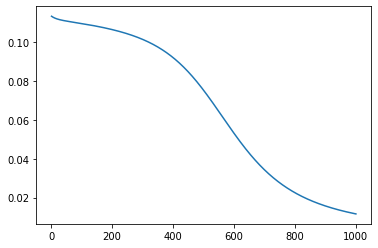

In [56]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))


One final thing we will do is to check how close the predictions are to our actual output


In [57]:
# final output from the model
output

array([[0.92613178, 0.86409938, 0.21389657]])

In [58]:
# actual target
y

array([[1, 1, 0]])

Further, the next thing we will do is to train our model on a different dataset, and visualize the performance by plotting a decision boundary after training.

Let’s get on to it!

In [59]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, random_state=42, noise=0.1)


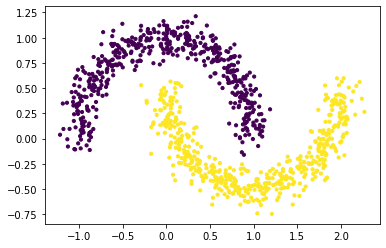

In [60]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

In [61]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

We will normalize the input so that our model trains faster


In [63]:
X -= X.min()
X /= X.max()

In [64]:
X.min(), X.max()

(0.0, 1.0)

In [65]:
np.unique(y)

array([0, 1])

In [66]:
X.shape, y.shape

((1000, 2), (1000,))

In [67]:
X = X.T

y = y.reshape(1, -1)

In [68]:
X.shape, y.shape

((2, 1000), (1, 1000))

Now we will define our network. We will update the following three hyperparameters, namely

+ Change hidden layer neurons to be 10
+ Change the learning rate to be 0.1
+ and train for more epochs


In [69]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 10  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 10000

losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 1000 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.22939
Error at epoch 1000 is 0.02214
Error at epoch 2000 is 0.01167
Error at epoch 3000 is 0.00872
Error at epoch 4000 is 0.00825
Error at epoch 5000 is 0.00791
Error at epoch 6000 is 0.00766
Error at epoch 7000 is 0.00745
Error at epoch 8000 is 0.00728
Error at epoch 9000 is 0.00715


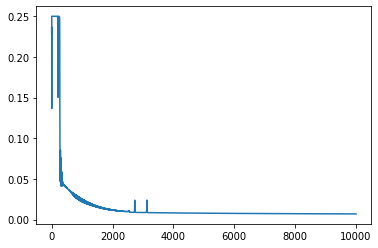

In [70]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [71]:
# final output from the model
output[:, :5]

array([[9.52567504e-01, 9.99632994e-01, 9.99298692e-01, 9.99981440e-01,
        5.78385978e-12]])

In [72]:
y[:, :5]

array([[1, 1, 1, 1, 0]])

Next, let’s visualize the performance by plotting the decision boundary. It’s ok if you don’t follow the code below, you can use it as-is for now. If you are curious, do post it in the comment section below

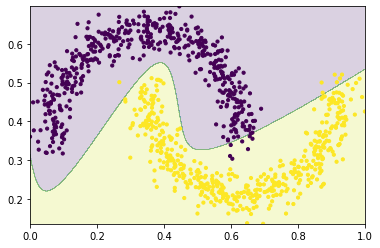

In [73]:
# Define region of interest by data limits
steps = 1000
x_span = np.linspace(X[0, :].min(), X[0, :].max(), steps)
y_span = np.linspace(X[1, :].min(), X[1, :].max(), steps)
xx, yy = np.meshgrid(x_span, y_span)

# forward pass for region of interest
hiddenLayer_linearTransform = np.dot(
    weights_input_hidden.T, np.c_[xx.ravel(), yy.ravel()].T
)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output_span = sigmoid(outputLayer_linearTransform)

# Make predictions across region of interest
labels = (output_span > 0.5).astype(int)

# Plot decision boundary in region of interest
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = (output > 0.5).astype(int)

# create scatter plot
ax.scatter(X[0, :], X[1, :], s=10, c=y.squeeze())
